In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind
from scipy import stats

In [4]:
# Load data
df = pd.read_csv('/content/E-commerce Customer Behavior.csv')

# Tampilkan 5 baris pertama
print(df.head())

# Cek informasi kolom
print(df.info())

   Customer ID  Gender  Age           City Membership Type  Total Spend  \
0          101  Female   29       New York            Gold      1120.20   
1          102    Male   34    Los Angeles          Silver       780.50   
2          103  Female   43        Chicago          Bronze       510.75   
3          104    Male   30  San Francisco            Gold      1480.30   
4          105    Male   27          Miami          Silver       720.40   

   Items Purchased  Average Rating  Discount Applied  \
0               14             4.6              True   
1               11             4.1             False   
2                9             3.4              True   
3               19             4.7             False   
4               13             4.0              True   

   Days Since Last Purchase Satisfaction Level  
0                        25          Satisfied  
1                        18            Neutral  
2                        42        Unsatisfied  
3               

In [5]:
#Hipotesis Nol (H₀):
#Tidak ada perbedaan total pembelian antara pelanggan yang mendapat diskon dan yang tidak.

#Hipotesis Alternatif (H₁):
#Pelanggan yang mendapat diskon memiliki total pembelian yang berbeda (bisa lebih tinggi atau lebih rendah).

# Grup A: Tidak mendapat diskon
group_a = df[df['Discount Applied'] == False]

# Grup B: Mendapat diskon
group_b = df[df['Discount Applied'] == True]

# Ukuran masing-masing grup
print(f"Jumlah Grup A (tanpa diskon): {len(group_a)}")
print(f"Jumlah Grup B (dengan diskon): {len(group_b)}")

Jumlah Grup A (tanpa diskon): 175
Jumlah Grup B (dengan diskon): 175


In [6]:
# Metrik 1 :
# Menguji apakah rata-rata Total Spend antara dua grup berbeda secara signifikan

# Ambil hanya nilai Total Spend dari masing-masing grup
spend_a = group_a['Total Spend']
spend_b = group_b['Total Spend']

# Lakukan uji t (asumsikan variansi tidak sama, equal_var=False)
t_stat, p_value = ttest_ind(spend_a, spend_b, equal_var=False)

# Tampilkan hasilnya
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretasi
alpha = 0.05
if p_value < alpha:
    print("➡️ Tolak H₀: Ada perbedaan signifikan Total Spend antara dua grup.")
else:
    print("✅ Gagal tolak H₀: Tidak ada perbedaan signifikan Total Spend antara dua grup.")

T-Statistic: 3.0377
P-Value: 0.0026
➡️ Tolak H₀: Ada perbedaan signifikan Total Spend antara dua grup.


In [7]:
print("📊 Statistik Total Spend per Grup:")
print("Group A (Kontrol - No Discount):")
print(f"  Mean: {group_a['Total Spend'].mean():.2f}")
print(f"  Std Dev: {group_a['Total Spend'].std():.2f}")
print()
print("Group B (Eksperimen - With Discount):")
print(f"  Mean: {group_b['Total Spend'].mean():.2f}")
print(f"  Std Dev: {group_b['Total Spend'].std():.2f}")

📊 Statistik Total Spend per Grup:
Group A (Kontrol - No Discount):
  Mean: 903.49
  Std Dev: 420.34

Group B (Eksperimen - With Discount):
  Mean: 787.27
  Std Dev: 281.87


In [8]:
# Dengan p-value 0.0026,
# kita sudah tahu bahwa menampilkan diskon memang berpengaruh signifikan
# terhadap pengeluaran pelanggan (Total Spend).

/tmp/ipython-input-3102846025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_a['Group'] = 'No Discount'
/tmp/ipython-input-3102846025.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_b['Group'] = 'Discount'
/tmp/ipython-input-3102846025.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Group')
/tmp/ipython-input-3102846025.py:20: FutureWarning

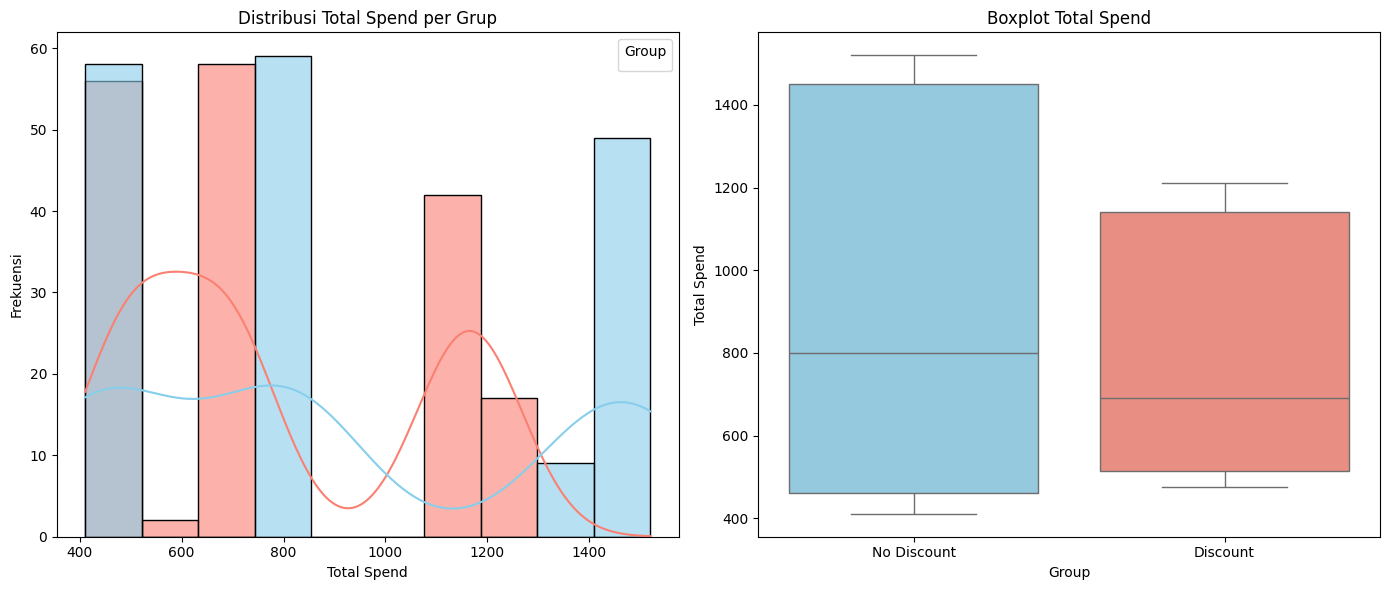

In [9]:
# Buat DataFrame gabungan
group_a['Group'] = 'No Discount'
group_b['Group'] = 'Discount'

combined_data = pd.concat([group_a, group_b])

# Buat plot
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=combined_data, x='Total Spend', hue='Group', kde=True, palette=['skyblue', 'salmon'], alpha=0.6)
plt.title('Distribusi Total Spend per Grup')
plt.xlabel('Total Spend')
plt.ylabel('Frekuensi')
plt.legend(title='Group')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=combined_data, x='Group', y='Total Spend', palette=['skyblue', 'salmon'])
plt.title('Boxplot Total Spend')
plt.ylabel('Total Spend')

plt.tight_layout()
plt.show()

In [10]:
# Metrik 2
# Apakah pelanggan membeli lebih banyak item ketika ada diskon?

In [11]:
# H₀: Tidak ada perbedaan signifikan jumlah item dibeli antara grup diskon & non-diskon.
# H₁: Ada perbedaan signifikan jumlah item dibeli antara grup diskon & non-diskon.

In [12]:
# T-test untuk Items Purchased
t_stat_items, p_val_items = stats.ttest_ind(group_a['Items Purchased'], group_b['Items Purchased'], equal_var=False)

print(f"T-Statistic (Items Purchased): {t_stat_items:.4f}")
print(f"P-Value (Items Purchased): {p_val_items:.4f}")

if p_val_items < 0.05:
    print("➡️ Tolak H₀: Ada perbedaan signifikan jumlah item yang dibeli antara dua grup.")
else:
    print("✅ Gagal tolak H₀: Tidak ada perbedaan signifikan jumlah item yang dibeli.")


T-Statistic (Items Purchased): 2.1460
P-Value (Items Purchased): 0.0328
➡️ Tolak H₀: Ada perbedaan signifikan jumlah item yang dibeli antara dua grup.


In [15]:
# Statistik deskriptif Items Purchased
mean_a = group_a['Items Purchased'].mean()
std_a = group_a['Items Purchased'].std()

mean_b = group_b['Items Purchased'].mean()
std_b = group_b['Items Purchased'].std()

print("📊 Statistik Items Purchased per Grup:")
print(f"Group A (No Discount):\n  Mean: {mean_a:.2f}\n  Std Dev: {std_a:.2f}")
print(f"Group B (With Discount):\n  Mean: {mean_b:.2f}\n  Std Dev: {std_b:.2f}")

📊 Statistik Items Purchased per Grup:
Group A (No Discount):
  Mean: 13.07
  Std Dev: 5.23
Group B (With Discount):
  Mean: 12.13
  Std Dev: 2.61


In [13]:
#  Menampilkan diskon berpengaruh signifikan terhadap jumlah item yang dibeli.

/tmp/ipython-input-635553989.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined, x='Group', y='Items Purchased', palette=['skyblue', 'salmon'])


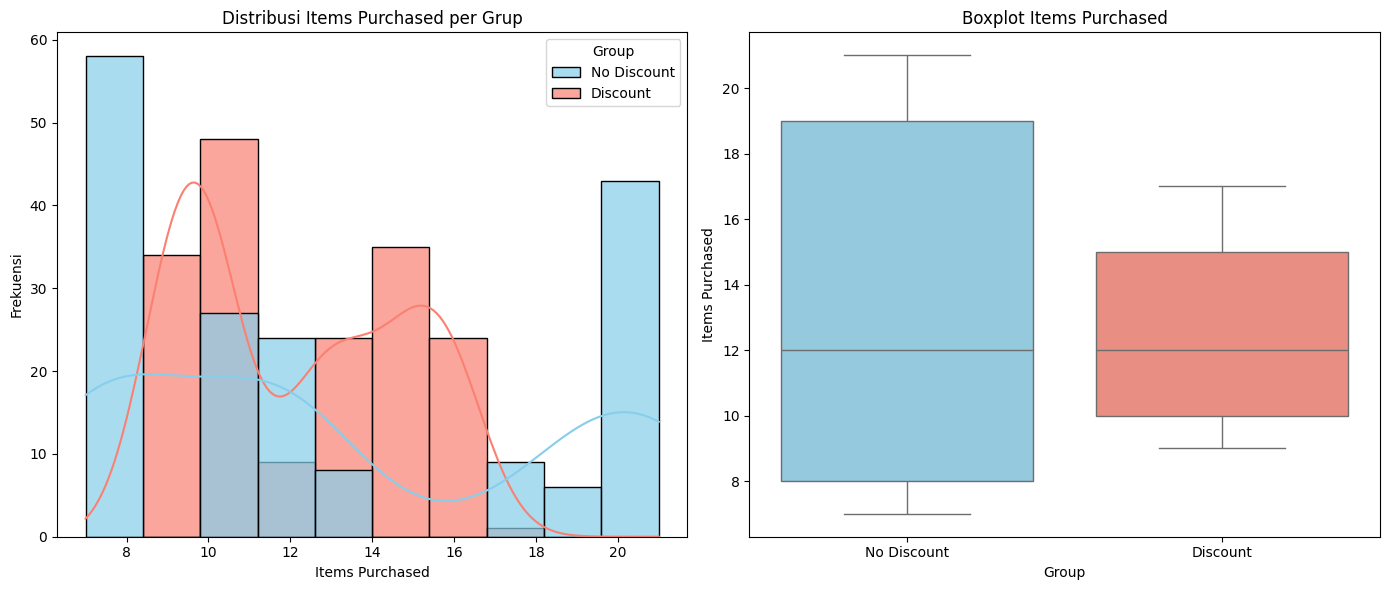

In [20]:
# Gabungkan dua grup jadi satu dataframe
group_a_temp = group_a.copy()
group_a_temp['Group'] = 'No Discount'

group_b_temp = group_b.copy()
group_b_temp['Group'] = 'Discount'

df_combined = pd.concat([group_a_temp, group_b_temp])

# Plot
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=df_combined, x='Items Purchased', hue='Group', kde=True,
             palette=['skyblue', 'salmon'], alpha=0.7)
plt.title('Distribusi Items Purchased per Grup')
plt.xlabel('Items Purchased')
plt.ylabel('Frekuensi')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_combined, x='Group', y='Items Purchased', palette=['skyblue', 'salmon'])
plt.title('Boxplot Items Purchased')
plt.xlabel('Group')
plt.ylabel('Items Purchased')

plt.tight_layout()
plt.show()